In [ ]:
# Medicare Cost Analysis

# OBJECTIVE: 
# This analysis aims to evaluate Medicare financial performance overall and by various organizations by 
# focusing on diagnosis related groups within Medicare claims data.

#----------------------------------------------------------------------------------------------------------
# PART 1: Data cleaning. Evaluate for missingness, rename variables to be easier to use.
# PART 2: Calculate diagnosis related groups by average covered charges, including top 10 DRGs. 
# PART 3: Calculate average Medicare payments by provider organization and grouped by state. 
# -------- Include top 10 provider organizations by average medicare payments. 


In [ ]:
!pip install pandas numpy matplotlib seaborn

In [49]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice in the notebook
%matplotlib inline
sns.set(style="whitegrid")


In [50]:
pd.__version__

'2.2.3'

In [51]:
# Inspect data for names, numeric column stats, missing values
import pandas as pd
df = pd.read_csv("data/MUP_INP_RY24_P03_V10_DY22_PrvSvc.CSV", encoding = "cp1252")
df.head()
df.info()
df.describe()

df.isnull().sum()
# 677 RUCA missingness - not relevant for our purposes; keep for later 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145742 entries, 0 to 145741
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           145742 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      145742 non-null  object 
 2   Rndrng_Prvdr_City          145742 non-null  object 
 3   Rndrng_Prvdr_St            145742 non-null  object 
 4   Rndrng_Prvdr_State_FIPS    145742 non-null  int64  
 5   Rndrng_Prvdr_Zip5          145742 non-null  int64  
 6   Rndrng_Prvdr_State_Abrvtn  145742 non-null  object 
 7   Rndrng_Prvdr_RUCA          145065 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     145065 non-null  object 
 9   DRG_Cd                     145742 non-null  int64  
 10  DRG_Desc                   145742 non-null  object 
 11  Tot_Dschrgs                145742 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       145742 non-null  float64
 13  Avg_Tot_Pymt_Amt           14

Rndrng_Prvdr_CCN               0
Rndrng_Prvdr_Org_Name          0
Rndrng_Prvdr_City              0
Rndrng_Prvdr_St                0
Rndrng_Prvdr_State_FIPS        0
Rndrng_Prvdr_Zip5              0
Rndrng_Prvdr_State_Abrvtn      0
Rndrng_Prvdr_RUCA            677
Rndrng_Prvdr_RUCA_Desc       677
DRG_Cd                         0
DRG_Desc                       0
Tot_Dschrgs                    0
Avg_Submtd_Cvrd_Chrg           0
Avg_Tot_Pymt_Amt               0
Avg_Mdcr_Pymt_Amt              0
dtype: int64

In [52]:
# Renamed all this to the term name in the Medicare Data Dictionary
df.rename(columns=
          {'Rndrng_Prvdr_CCN': 'Rendering Provider CCN',
           'Rndrng_Prvdr_Org_Name': 'Rendering Provider Org. Name',
           'Rndrng_Prvdr_City': 'Rendering Provider City',
           'Rndrng_Prvdr_St': 'Rendering Provider Street',
           'Rndrng_Prvdr_State_Abrvtn': 'Rendering Provider State Abreviation',
           'Rndrng_Prvdr_State_FIPS': 'Rendering Provider State FIPS Code',
           'Rndrng_Prvdr_Zip5': 'Rendering Provider Zip Code',
           'Rndrng_Prvdr_RUCA': 'Rendering Provider Rural-Urban Commuting Code', 
           'Rndrng_Prvdr_RUCA_Desc': 'Rendering Provider Rural-Urban Commuting Area Description',
           'DRG_Cd': 'Diagnosis Related Group (DRG) Definition', 
           'DRG_Desc': 'Diagnosis Related Group (DRG) Description',
           'Tot_Dschrgs': 'Total Discharges',
           'Avg_Submtd_Cvrd_Chrg': 'Average Covered Charges',
           'Avg_Tot_Pymt_Amt': 'Average Total Payments',
           'Avg_Mdcr_Pymt_Amt': 'Average Medicare Payments'}, inplace=True)
           
           

In [54]:
DRG_Avg_Charge = df.groupby('Diagnosis Related Group (DRG) Definition')['Average Covered Charges'].mean()

# sort in descending order for highest averages
DRG_sorted = DRG_Avg_Charge.sort_values(ascending=False)

# take top 10
top_10_DRG = DRG_sorted.head(10)
top_10_DRG

# Convert to "millions of" 
top_10_DRG = top_10_DRG/100000

Diagnosis Related Group (DRG) Definition
18    1,825,808.39
1     1,502,717.93
7       936,285.60
3       893,105.51
814     762,380.61
5       722,069.06
14      612,851.60
576     581,024.92
4       580,486.76
8       504,290.46
Name: Average Covered Charges, dtype: float64

In [19]:
df.to_csv('renamed_MedicareAnalysis.csv', index=False)

In [24]:
pd.set_option('display.float_format', '{:,.2f}'.format)

C:\Users\leigh\AppData\Local\Temp\ipykernel_24864\112971188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\leigh\AppData\Local\Temp\ipykernel_24864\112971188.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


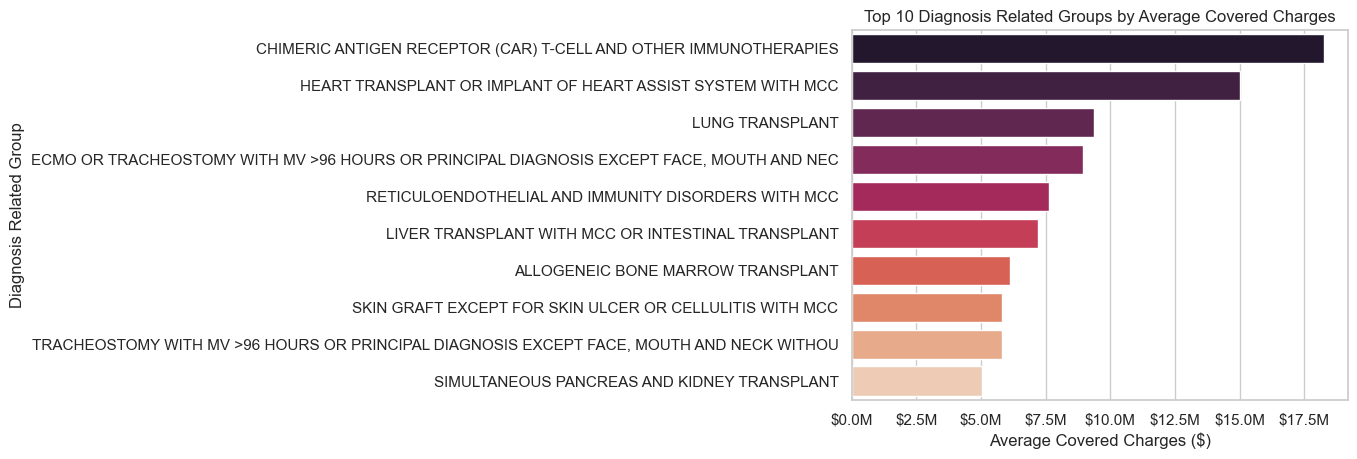

In [45]:
# Create a plotted bar chart of the average covered charges shown above 
import matplotlib.ticker as mtick 

sns.barplot(
    y=top_10_DRG.index,
    x=top_10_DRG.values,
    palette='rocket'
)
plt.xlabel('Average Covered Charges ($)')
plt.ylabel('Diagnosis Related Group')
plt.title('Top 10 Diagnosis Related Groups by Average Covered Charges')

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.1f}M'))
plt.tight_layout()
plt.show()

In [67]:
# Show average medicare payments by Rendering Provider Org. Name, further grouped by Rendering Provider State 

# Group by State and Provider Org name, calculate average medicare payment
grouped_payment = df.groupby(
    ['Rendering Provider State Abreviation', 'Rendering Provider Org. Name']
)['Average Medicare Payments'].mean().reset_index()

grouped_payment

,Rendering Provider State Abreviation,Rendering Provider Org. Name,Average Medicare Payments
0,AK,Alaska Native Medical Center,"22,475.16"
1,AK,Alaska Regional Hospital,"18,633.17"
2,AK,Bartlett Regional Hospital,"23,793.11"
3,AK,Central Peninsula General Hospital,"19,220.13"
4,AK,Fairbanks Memorial Hospital,"21,495.00"
...,...,...,...
3005,WY,Sagewest Health Care,"11,181.17"
3006,WY,Sheridan Memorial Hospital,"13,958.53"
3007,WY,St Johns Medical Center,"24,451.54"
3008,WY,Summit Medical Center,"11,028.23"


In [68]:
# Sort by payment amounts, descending values, look at first 10 - regardless of state 
grouped_payment= grouped_payment.sort_values(by='Average Medicare Payments', ascending=False)
grouped_payment.head(10)


,Rendering Provider State Abreviation,Rendering Provider Org. Name,Average Medicare Payments
2576,TX,Faith Community Hospital,"349,857.69"
715,GA,Burke Medical Center,"250,429.07"
2585,TX,Harris Health System,"119,369.69"
944,IL,Provident Hospital Of Chicago,"108,467.08"
2757,TX,Wise Health System,"99,187.79"
903,IL,John H Stroger Jr Hospital,"69,608.62"
1309,MD,Levindale Hebrew Geriatric Center And Hospital,"65,489.13"
1331,MD,University Of Maryland Medical Center,"58,845.15"
1912,NY,Metropolitan Hospital Center,"54,154.88"
179,AZ,Valleywise Health Medical Center,"53,436.48"
